At this point the summary statistics for all the variables in the dataset have been generated. Data Transformation of the categorical variables using the Label Encoder

function in scikit-learn has also been done. Finally, the missing values for the bmi variable have been imputed using the grouped means of the values of the other variables.

Note also that the only variable in this dataset with missing values is the bmi variable.

The dataset has been obtained from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\laure\Downloads\healthcare-dataset-stroke-data.csv")
df_1 = pd.read_csv(r"C:\Users\laure\Downloads\healthcare-dataset-stroke-data.csv") #I wrote code before having the encoded file and its less time to switch data sources than change code
print (df.head(6))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  for

In [3]:
#checking for missing values
print (df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [4]:
#select all columns except the first since the id variable is irrelevant for meaningful predictions of any appropriate outcome variable in this dataset

df = df.iloc[:, 1:] 
print (df.head(6))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly s

In [5]:
print (df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
# Convert multiple object columns to category
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].astype('category')

# Check the data types
print(df.dtypes)

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


In [7]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2994
Male: 2115
Other: 1

Count of each level in 'ever_married':
Yes: 3353
No: 1757

Count of each level in 'work_type':
Private: 2925
Self-employed: 819
children: 687
Govt_job: 657
Never_worked: 22

Count of each level in 'Residence_type':
Urban: 2596
Rural: 2514

Count of each level in 'smoking_status':
never smoked: 1892
Unknown: 1544
formerly smoked: 885
smokes: 789


In [8]:
#select all numerical variables in this dataset and obtain their summary statistics

numeric_columns = df.select_dtypes(include=['float64']).columns
print(df[numeric_columns].describe())


               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


In [9]:
#Obtain the count information for the values in the stroke, hypertension, and  heart_disease variables

def get_counts(df, column_name):
    # Convert the column_name type to int64, handling potential errors
    df[column_name] = pd.to_numeric(df[column_name], errors='raise').astype('int64')
    
    #calculate the value counts and sort by index which will be the column_name values.
    value_counts = df[column_name].value_counts().sort_index()
    print(f"Frequency counts for '{column_name}':\n{value_counts}\n")

get_counts(df,'stroke')
get_counts(df, 'hypertension')
get_counts(df, 'heart_disease')

Frequency counts for 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64

Frequency counts for 'hypertension':
hypertension
0    4612
1     498
Name: count, dtype: int64

Frequency counts for 'heart_disease':
heart_disease
0    4834
1     276
Name: count, dtype: int64



In [10]:
#Age 
#We are creating a new variable Age_temp_cat using the Age variable. The purpose of this new variable 
#is to help us in imputing the missing values of the bmi variable

#bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
#labels = [0, 1, 2, 3, 4, 5, 6,7,8]
#bins = [0,15, 30, 45, 60, 75, float ('inf') ]
#labels = [0, 1, 2, 3, 4, 5]
#bins = [0, 20, 40, 60,  float('inf')]
#The bins above were used to play around with the data when determining the optimal bin values 
#for creating the new variable Age_temp_cat from Age

#Note that the minimum value for Age is 0.08 and the maximum value is 82

bins = [0, 20, 40, 60,  float('inf')]
labels = [0, 1, 2, 3]



df['Age_temp_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) 
df['Age_temp_cat'] = df['Age_temp_cat'].astype('category')

# Initialize and fit LabelEncoder
encoder = LabelEncoder()
df['Age_temp'] = encoder.fit_transform(df['Age_temp_cat'])
# Drop the intermediate 'Age_temp_cat' column
df.drop('Age_temp_cat', axis=1, inplace=True)
print (df.head(3))





   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Age_temp  
0          Urban             228.69  36.6  formerly smoked       1         3  
1          Rural             202.21   NaN     never smoked       1         3  
2          Rural             105.92  32.5     never smoked       1         3  


In [11]:
#avg_glucose_level

#We are creating a new variable avg_glucose_level_temp_cat using the avg_glucose_level variable. The purpose of this new variable 
#is to help us in imputing the missing values of the bmi variable

#Note that the minimum value for avg_glucose_level is 55.12 and  the maximum value is 271.74

# Define the bins and labels
#bins = [50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, float('inf')]
#labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#bins = [50, 90, 130, 170, 210, float('inf')]
#labels = [1, 2, 3, 4, 5]
#bins = [50, 100, 150, 200, float('inf')]
#labels = [1, 2, 3, 4]
#bins = [50, 120, 190, float('inf')]
#labels = [1, 2, 3]
#bins = [50, 150,float('inf')]
#labels = [1, 2]

#The bins above were used to play around with the data when determining the optimal bin values 
#for creating the new variable avg_glucose_level_temp_cat from avg_glucose_level

# Define the bins and labels
bins = [50, 120, 190, float('inf')]
labels = [1, 2, 3]

# Create the 'avg_glucose_level_temp' column using pd.cut
df['avg_glucose_level_temp_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['avg_glucose_level_temp'] = label_encoder.fit_transform(df['avg_glucose_level_temp_cat']) + 1 # +1 to match the original labels

df.drop('avg_glucose_level_temp_cat', axis=1, inplace=True)
# Print the DataFrame with the new categorical column
print(df.head(3))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Age_temp  \
0          Urban             228.69  36.6  formerly smoked       1         3   
1          Rural             202.21   NaN     never smoked       1         3   
2          Rural             105.92  32.5     never smoked       1         3   

   avg_glucose_level_temp  
0                       3  
1                       3  
2                       1  


In [12]:
#Obtain the frequency counts of the newly created variables Age_temp and avg_glucose_level_temp
get_counts(df,'Age_temp')
get_counts(df, 'avg_glucose_level_temp')

Frequency counts for 'Age_temp':
Age_temp
0     966
1    1204
2    1564
3    1376
Name: count, dtype: int64

Frequency counts for 'avg_glucose_level_temp':
avg_glucose_level_temp
1    3991
2     589
3     530
Name: count, dtype: int64



In [13]:
#Gender variable
#Transform the Gender variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
get_counts(df,'gender_encoded')

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Gender Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
2       1
Name: count, dtype: int64

Gender Mapping:
Female: 0
Male: 1
Other: 2


In [14]:
#ever_married
#Transform the ever_married variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'ever_married' column
df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("ever_married Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Age_temp  \
0          Urban             228.69  36.6  formerly smoked       1         3   
1          Rural             202.21   NaN     never smoked       1         3   
2          Rural             105.92  32.5     never smoked       1         3   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  
0                       3               1                     1  
1                       3               0                     1  
2                       1               1                     1  
ever_married Mapping:
No: 0
Yes: 1


In [15]:
#Work type

#Transform the Work type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'work_type' column
df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))



# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("work_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")




   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Age_temp  \
0          Urban             228.69  36.6  formerly smoked       1         3   
1          Rural             202.21   NaN     never smoked       1         3   
2          Rural             105.92  32.5     never smoked       1         3   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0                       3               1                     1   
1                       3               0                     1   
2                       1               1                     1   

   work_type_encoded  
0                  2  
1                  3  
2                  2  
work_type Map

In [16]:
#Residence type

#Transform the Residence type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Residence_type' column
df['Residence_type_encoded'] = label_encoder.fit_transform(df['Residence_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")



   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Age_temp  \
0          Urban             228.69  36.6  formerly smoked       1         3   
1          Rural             202.21   NaN     never smoked       1         3   
2          Rural             105.92  32.5     never smoked       1         3   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0                       3               1                     1   
1                       3               0                     1   
2                       1               1                     1   

   work_type_encoded  Residence_type_encoded  
0                  2                       1  
1          

In [17]:
#smoking status
#Transform the smoking status variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_status' column
df['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Age_temp  \
0          Urban             228.69  36.6  formerly smoked       1         3   
1          Rural             202.21   NaN     never smoked       1         3   
2          Rural             105.92  32.5     never smoked       1         3   

   avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0                       3               1                     1   
1                       3               0                     1   
2                       1               1                     1   

   work_type_encoded  Residence_type_encoded  smoking_status_encoded  
0                  2              

In [18]:
print (df.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
Age_temp                     int64
avg_glucose_level_temp       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
dtype: object


In [19]:

#  Imputes missing BMI values using grouped means based on other relevant variables in this dataframe
def impute_bmi_with_grouped_means(df):
     # Identify the variables to group by
    grouping_columns = [
                         'gender_encoded',
                        'ever_married_encoded', 'work_type_encoded',
                        'Residence_type_encoded', 'smoking_status_encoded',
                        'Age_temp' , 'avg_glucose_level_temp'
                        ]
    # Calculate grouped means
    grouped_means = df.groupby(grouping_columns)['bmi'].transform('mean')

     # Impute missing values
    df['bmi'] = df['bmi'].fillna(grouped_means)
    return (df)

# Impute missing BMI values
df = impute_bmi_with_grouped_means(df)
print (df.head(3))


    



   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0          Urban             228.69  36.600000  formerly smoked       1   
1          Rural             202.21  30.007143     never smoked       1   
2          Rural             105.92  32.500000     never smoked       1   

   Age_temp  avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
0         3                       3               1                     1   
1         3                       3               0                     1   
2         3                       1               1                     1   

   work_type_encoded  Residence_type_encoded  smoking_status_encoded  
0             

In [20]:
#checking again for presence of missing values
print (df.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       4
smoking_status            0
stroke                    0
Age_temp                  0
avg_glucose_level_temp    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
dtype: int64


In [21]:
# Print rows with missing BMI values
missing_bmi_rows = df[df['bmi'].isnull()]
if not missing_bmi_rows.empty:
    print("Rows with missing BMI values:")
    print(missing_bmi_rows)
else:
    print("No missing BMI values found.")

Rows with missing BMI values:
      gender   age  hypertension  heart_disease ever_married work_type  \
19      Male  57.0             0              1           No  Govt_job   
1102  Female  23.0             0              0           No   Private   
1596    Male  47.0             0              0           No   Private   
2752  Female  38.0             0              0          Yes   Private   

     Residence_type  avg_glucose_level  bmi smoking_status  stroke  Age_temp  \
19            Urban             217.08  NaN        Unknown       1         2   
1102          Rural             193.22  NaN         smokes       0         1   
1596          Rural             237.17  NaN        Unknown       0         2   
2752          Rural             217.55  NaN         smokes       0         1   

      avg_glucose_level_temp  gender_encoded  ever_married_encoded  \
19                         3               1                     0   
1102                       3               0              

In [22]:
# imputing again without using the avg_glucose_level variable we used earlier
def impute_bmi_with_grouped_means(df):
     # Identify the variables to group by
    grouping_columns = [
                         'gender_encoded',
                        'ever_married_encoded', 'work_type_encoded',
                        'Residence_type_encoded', 'smoking_status_encoded',
                        'Age_temp' 
                        ]
    # Calculate grouped means
    grouped_means = df.groupby(grouping_columns)['bmi'].transform('mean')

     # Impute missing values
    df['bmi'] = df['bmi'].fillna(grouped_means)
    return (df)

# Impute missing BMI values
df = impute_bmi_with_grouped_means(df)

In [23]:
#checking again for presence of missing values
print (df.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
Age_temp                  0
avg_glucose_level_temp    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
dtype: int64


Lauren's thought process/Goal:
1. Understand the single variable correlation with Stroke

    1.1  Pick the top correlating single var, and complete Figures (Raw data and normalize to scale to be able to compare relative)
    
    1.2 Pick the correlating single var, and complete Figures (raw data count and normalize to scale to be able to compare relative)
2. Understand the Multi variable variable (work type, and smoking status) correlation with Stroke... Need more time on this and how to see corr.
3. Understand correlation between variables and if theres colinary

Goal 1

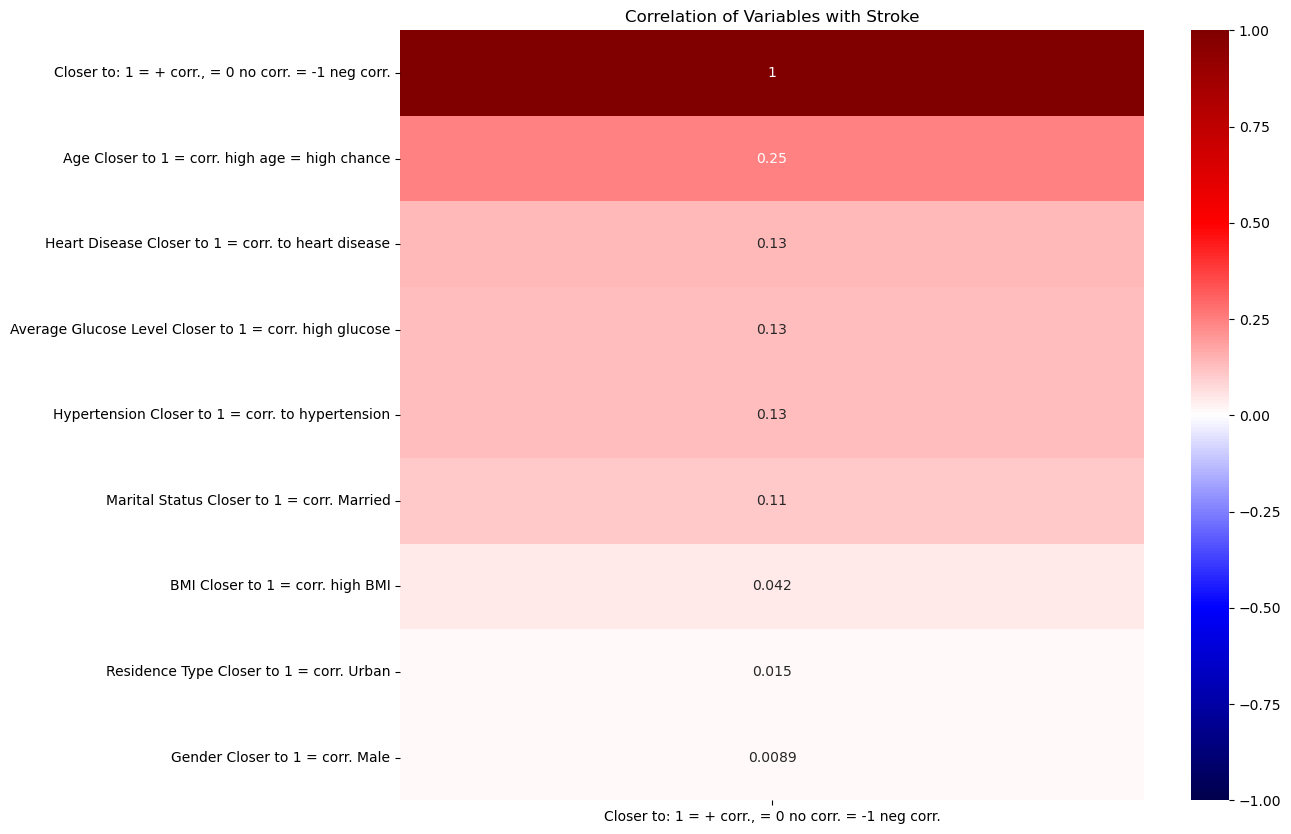

In [31]:
# Specify the columns to use
columns_to_use = ['gender_encoded', 'ever_married_encoded', 'Residence_type_encoded', 
                  'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create a dictionary to map the original column names to better labels
column_labels = {
    'gender_encoded': 'Gender Closer to 1 = corr. Male',
    'ever_married_encoded': 'Marital Status Closer to 1 = corr. Married',
    'Residence_type_encoded': 'Residence Type Closer to 1 = corr. Urban',
    'age': 'Age Closer to 1 = corr. high age = high chance',
    'hypertension': 'Hypertension Closer to 1 = corr. to hypertension',
    'heart_disease': 'Heart Disease Closer to 1 = corr. to heart disease',
    'avg_glucose_level': 'Average Glucose Level Closer to 1 = corr. high glucose',
    'bmi': 'BMI Closer to 1 = corr. high BMI',
    'stroke': 'Closer to: 1 = + corr., = 0 no corr. = -1 neg corr.'
}

# Subset the data to use only the specified columns
data_filtered = df[columns_to_use]

# Rename the columns using the column_labels dictionary
data_filtered = data_filtered.rename(columns=column_labels)

# Calculate the correlation matrix for the relevant numeric columns
correlation_matrix_filtered = data_filtered.corr()

# Create a heatmap for the correlation of the variables to having a stroke using a better colorblind-friendly palette
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered[['Closer to: 1 = + corr., = 0 no corr. = -1 neg corr.']].sort_values(by='Closer to: 1 = + corr., = 0 no corr. = -1 neg corr.', ascending=False), annot=True, cmap='seismic', vmin=-1, vmax=1)

# Set labels and title
plt.title('Correlation of Variables with Stroke')
plt.show()


Looking at biggest corrleation of a var to stoke, Age

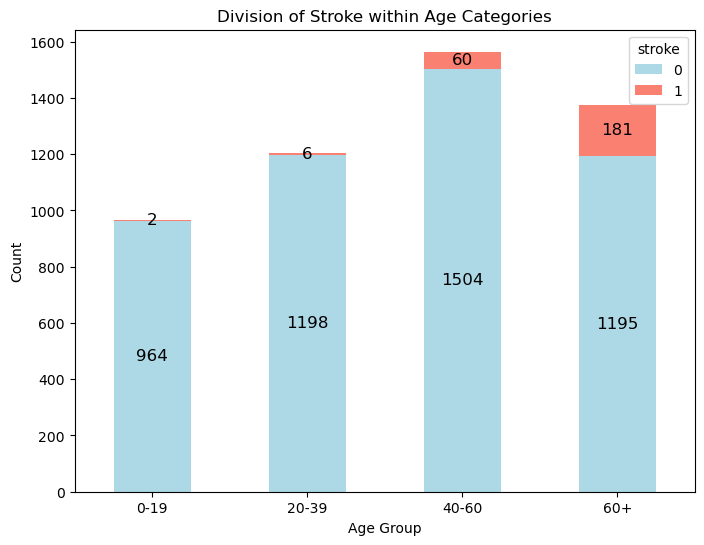

<Figure size 640x480 with 0 Axes>

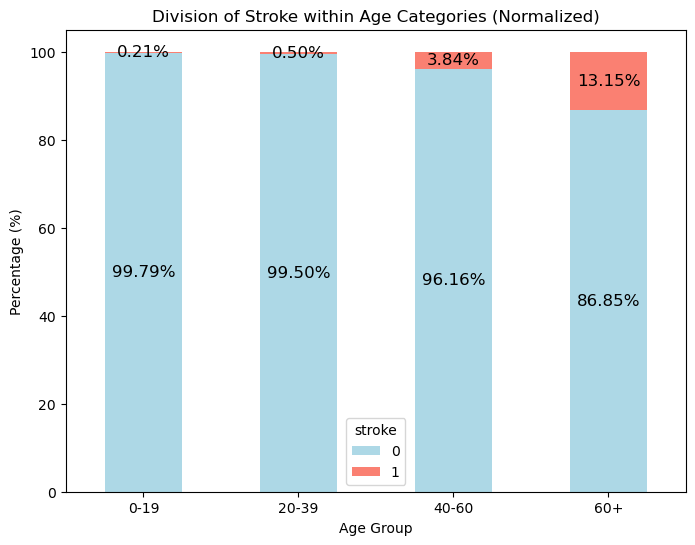

<Figure size 640x480 with 0 Axes>

In [ ]:
# Group the data by Age_temp and stroke, and count the occurrences
age_stroke_counts = df.groupby(['Age_temp', 'stroke']).size().unstack(fill_value=0)

# Rename Age_temp back to the actual age ranges
age_stroke_counts = age_stroke_counts.rename(index={0: '0-19', 1: '20-39', 2: '40-60', 3: '60+'})

# Plot the count bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = age_stroke_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

# Add counts on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Division of Stroke within Age Categories')

# Display the plot
plt.xticks(rotation=0)
plt.show()

# Normalize the counts by dividing by the total count for each age group
age_stroke_counts_normalized = age_stroke_counts.div(age_stroke_counts.sum(axis=1), axis=0)

# Convert the normalized values to percentages and round to 2 decimal places
age_stroke_counts_percent = age_stroke_counts_normalized * 100
age_stroke_counts_percent = age_stroke_counts_percent.round(2)

# Plot the updated percentage bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = age_stroke_counts_percent.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

# Add percentages on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage (%)')
ax.set_title('Division of Stroke within Age Categories (Normalized)')

# Display the plot
plt.xticks(rotation=0)
plt.show()



Easy to see the percent of stroke increase with age

Looking at least correlation of gender and correlation to Stroke


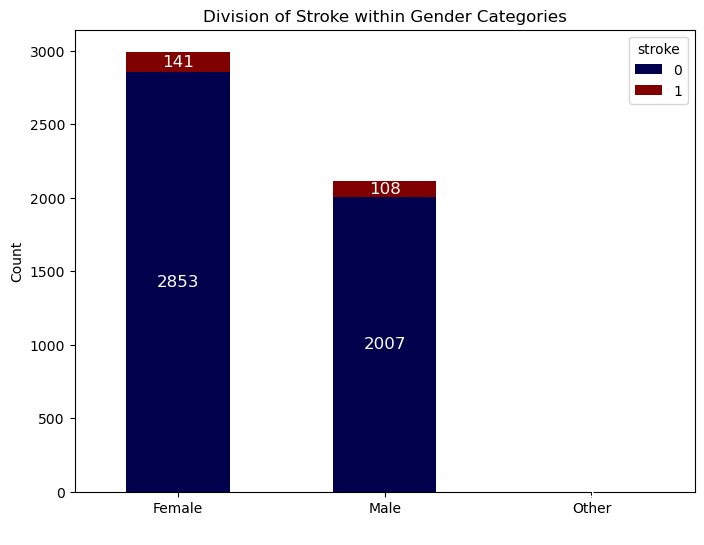

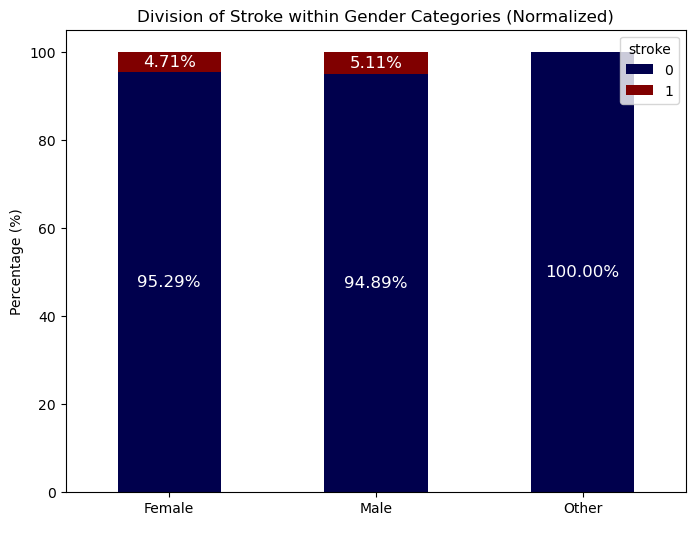

In [26]:
# Group the data by gender_encoded and stroke, and count the occurrences
gender_stroke_counts = df.groupby(['gender_encoded', 'stroke']).size().unstack(fill_value=0)

# Rename gender_encoded back to Female and Male
gender_stroke_counts = gender_stroke_counts.rename(index={0: 'Female', 1: 'Male', 2: 'Other'})

# Plot the count bar chart using the seismic color palette as its colour blind friendly
fig, ax = plt.subplots(figsize=(8, 6))
bars = gender_stroke_counts.plot(kind='bar', stacked=True, ax=ax, cmap='seismic')

# Add counts on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='white')

# Set labels and title
ax.set_xlabel(' ') #Removing the x label bc it looks like its saying Male gender rather than the x label is Gender
ax.set_ylabel('Count')
ax.set_title('Division of Stroke within Gender Categories')

# Display the plot
plt.xticks(rotation=0)
plt.show()

# Normalize the counts by dividing by the total count for each gender category
gender_stroke_counts_normalized = gender_stroke_counts.div(gender_stroke_counts.sum(axis=1), axis=0)

# Convert the normalized values to percentages and round to 2 decimal places
gender_stroke_counts_percent = gender_stroke_counts_normalized * 100
gender_stroke_counts_percent = gender_stroke_counts_percent.round(2)

# Plot the updated percentage bar chart using the seismic color palette
fig, ax = plt.subplots(figsize=(8, 6))
bars = gender_stroke_counts_percent.plot(kind='bar', stacked=True, ax=ax, cmap='seismic')

# Add percentages on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='white')

# Set labels and title
ax.set_xlabel(' ') #Removing the x label bc it looks like its saying Male gender rather than the x label is Gender
ax.set_ylabel('Percentage (%)')
ax.set_title('Division of Stroke within Gender Categories (Normalized)')

# Display the plot
plt.xticks(rotation=0)
plt.show()


Doesn't look to have a big difference between Male v Female

Goal 2: need more pragmatic way of looking at data but Regardless, I think its fair to say we know smoking is going to have a large effect.  ill plot below to see/explore!

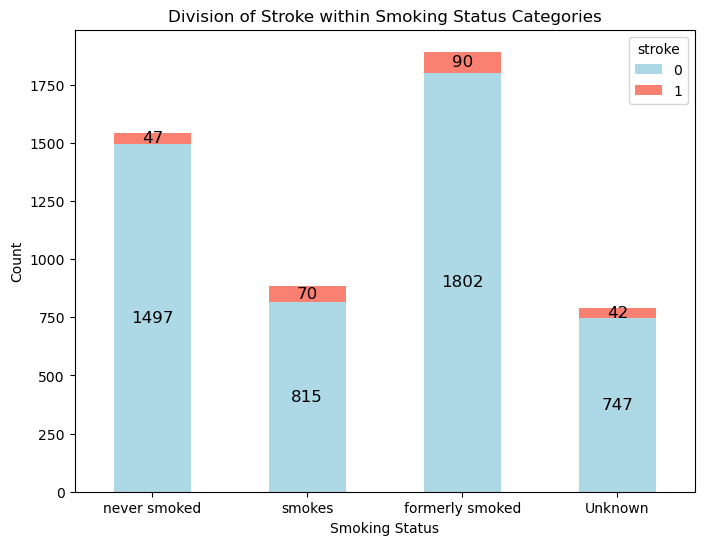

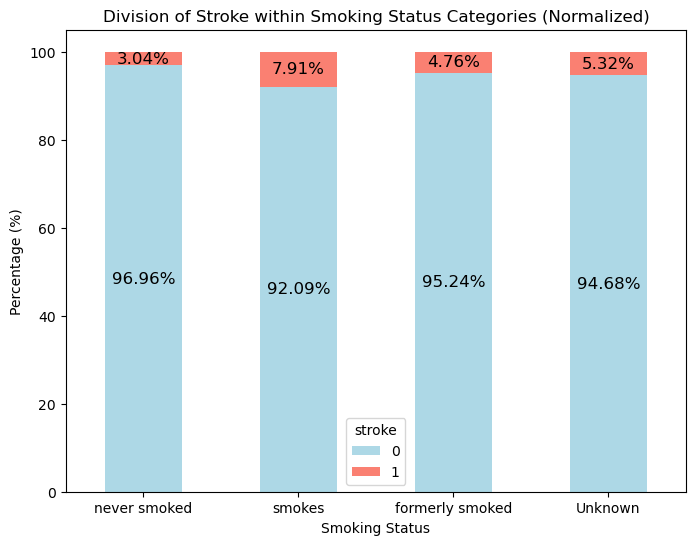

In [27]:
# Group the data by smoking_status_encoded and stroke, and count the occurrences
smoking_stroke_counts = df.groupby(['smoking_status_encoded', 'stroke']).size().unstack(fill_value=0)

# Rename smoking_status_encoded back to the actual smoking status categories
smoking_stroke_counts = smoking_stroke_counts.rename(index={0: 'never smoked', 1: 'smokes', 2: 'formerly smoked', 3: 'Unknown'})

# Plot the count bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = smoking_stroke_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

# Add counts on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Count')
ax.set_title('Division of Stroke within Smoking Status Categories')

# Display the plot
plt.xticks(rotation=0)
plt.show()

# Normalize the counts by dividing by the total count for each smoking status category
smoking_stroke_counts_normalized = smoking_stroke_counts.div(smoking_stroke_counts.sum(axis=1), axis=0)

# Convert the normalized values to percentages and round to 2 decimal places
smoking_stroke_counts_percent = smoking_stroke_counts_normalized * 100
smoking_stroke_counts_percent = smoking_stroke_counts_percent.round(2)

# Plot the updated percentage bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = smoking_stroke_counts_percent.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

# Add percentages on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Percentage (%)')
ax.set_title('Division of Stroke within Smoking Status Categories (Normalized)')

# Display the plot
plt.xticks(rotation=0)
plt.show()


Looking at colinarity.

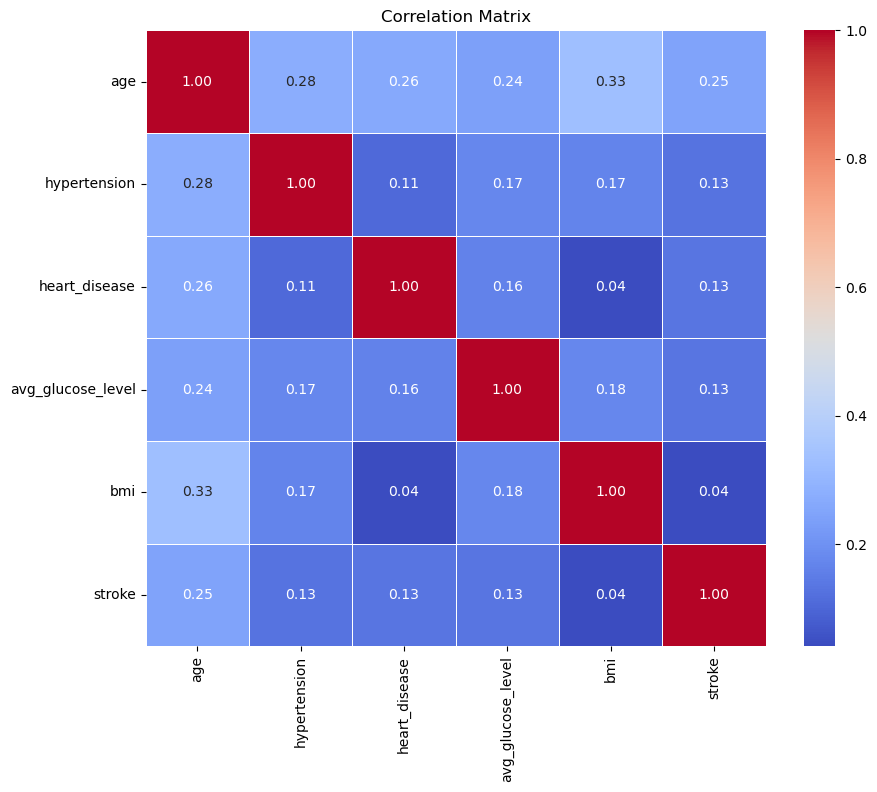

In [36]:
# Remove the 'id' column from the first dataset
data_cleaned = df_1.drop(columns=['id'])

# Select only numerical columns for correlation in the cleaned dataset
numeric_data_cleaned = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the cleaned data
correlation_matrix_cleaned = numeric_data_cleaned.corr()

# Plot the heatmap for the cleaned correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The following correlations may be intesting to explore

Hypertension vs. Age: 0.28

Hypertension vs. Avg Glucose Level: 0.17

Hypertension vs. BMI: 0.16

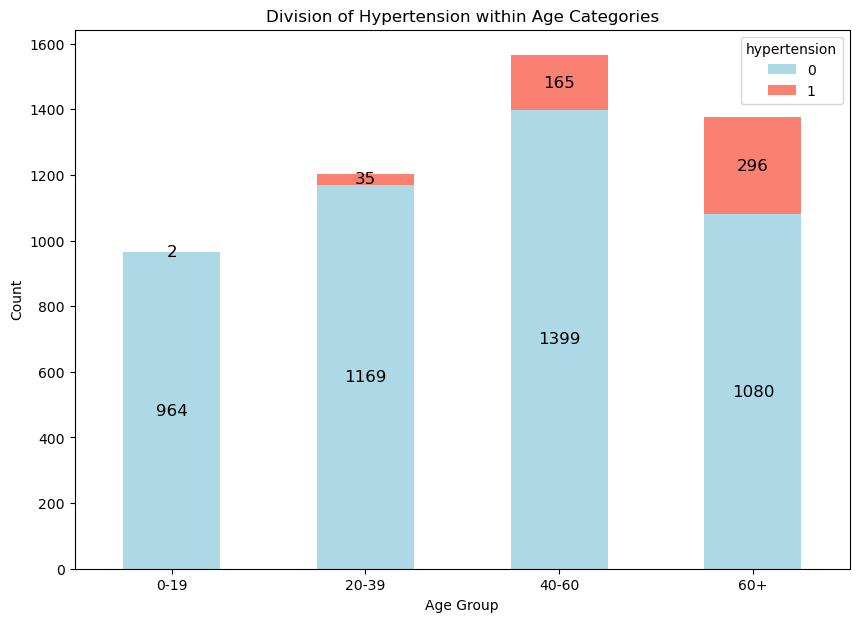

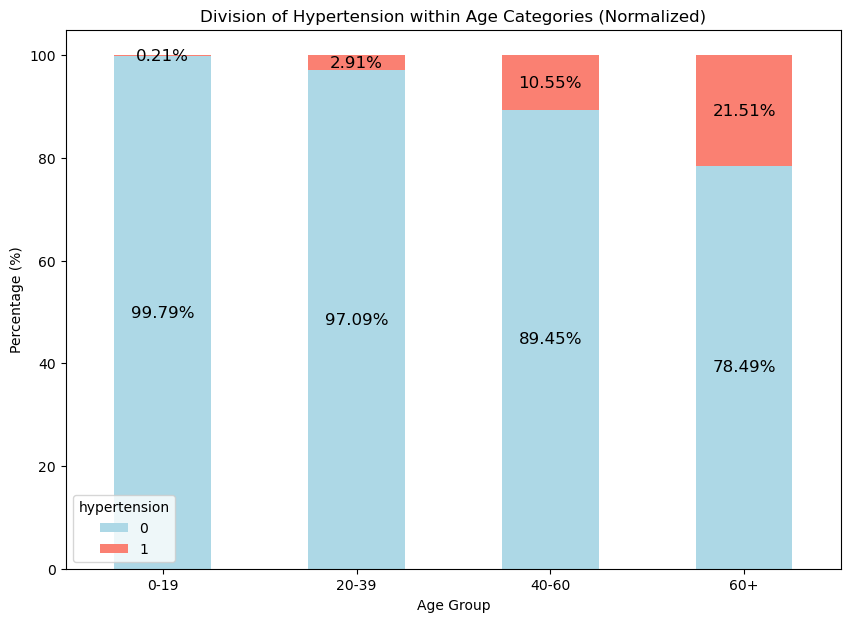

In [37]:
# Group the data by Age_temp and Hypertension, and count the occurrences 
age_hypertension_counts = df.groupby(['Age_temp', 'hypertension']).size().unstack(fill_value=0)
# Rename Age_temp back to the actual age ranges
age_hypertension_counts = age_hypertension_counts.rename(index={0: '0-19', 1: '20-39', 2: '40-60', 3: '60+'})

# Plot the count bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = age_hypertension_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

# Add counts on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Division of Hypertension within Age Categories')

# Display the plot
plt.xticks(rotation=0)
plt.show()


# Normalize the counts by dividing by the total count for each age group
age_hypertension_counts_normalized = age_hypertension_counts.div(age_hypertension_counts.sum(axis=1), axis=0)

# Convert the normalized values to percentages and round to 2 decimal places
age_hypertension_counts_percent = age_hypertension_counts_normalized * 100
age_hypertension_counts_percent = age_hypertension_counts_percent.round(2)

# Plot the updated percentage bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bars = age_hypertension_counts_percent.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])

# Add percentages on top of the bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}%', 
                    xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                    ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage (%)')
ax.set_title('Division of Hypertension within Age Categories (Normalized)')

# Display the plot
plt.xticks(rotation=0)
plt.show()


Boxplot: Hypertension Vs. Avg Glucose Level 

C:\Users\laure\AppData\Local\Temp\ipykernel_31388\2075629678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hypertension', y='avg_glucose_level', data=df, palette='Set2')


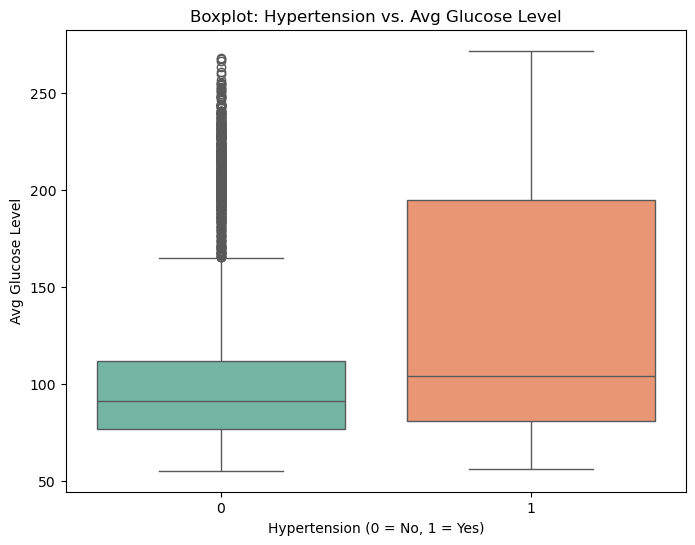

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='hypertension', y='avg_glucose_level', data=df, palette='Set2')

# Set labels and title for the boxplot
ax.set_xlabel('Hypertension (0 = No, 1 = Yes)')
ax.set_ylabel('Avg Glucose Level')
ax.set_title('Boxplot: Hypertension vs. Avg Glucose Level')

# Display the plot
plt.show()